In [43]:
import importlib
%load_ext autoreload

import sys
import os
sys.path.append(os.path.abspath(".."))

import mypackage
import mypackage.sentence
import mypackage.clustering

from sentence_transformers import SentenceTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
doc = mypackage.elastic.Document.from_json("../cached_docs/pubmed_0001.json", text_path="article")

In [ ]:
sentences = mypackage.sentence.doc_to_sentences(doc, model)
merged = mypackage.sentence.iterative_merge(sentences, threshold=0.6, round_limit=None, pooling_method="average")

In [91]:
%autoreload 2

print(len(merged))

labels, clusters = mypackage.clustering.chain_clustering(merged)
print(len(clusters))

77
4


/home/zoukos/ceid/final/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


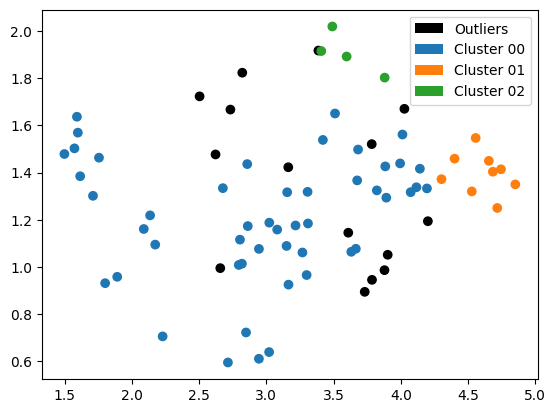

In [92]:
mypackage.clustering.visualize_clustering(merged, labels)

In [79]:
from rich.panel import Panel
from rich.console import Console

console = Console()

for cluster in clusters.items():
    text = "\n\n".join([chain.text for chain in cluster[1]])
    console.print(Panel(text, title = f"Cluster {cluster[0]:02}",border_style="cyan bold"))

╭────────────────────────────────────────────────── Cluster 00 ───────────────────────────────────────────────────╮
│ small non - coding rnas are transcribed into mrna but remain untranslated in eukaryotic cells . they include    │
│ sirna ( small interfering rna ) , mirna ( microrna ) , pirna ( piwi - interacting rna ) and snorna ( small      │
│ nucleolar rna ) . mirnas are a class of multifunctional singled - stranded small rna which are ~20  nt in       │
│ length and regulate the stability or translational efficiency of targeted messenger rna depending on the base - │
│ pairing complementarity between the mirna and its target mrna [ 1 , 2 ] . although over 1,000 mirna sequences   │
│ have been identified from the tissues or cells of human origin and other species , as many as 1,000 to 10,000   │
│ mirnas per genome have been predicted [ 3 , 4 ] .                                                               │
│                                                                                                                 │
│ as small non - coding rnas regulate gene expression and tumorigenesis , they may represent a novel cancer       │
│ therapy .                                                                                                       │
│                                                                                                                 │
│ high - throughput deep sequencing identified a group of small rnas matching pirna sequences in human breast     │
│ cancer tissues and breast cancer cell lines .                                                                   │
│                                                                                                                 │
│ the study of these non - coding small rnas in human cancer is just starting .                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Cluster 01 ───────────────────────────────────────────────────╮
│ mirnas regulate a broad range of biological processes including timing of development , cell cycle progression  │
│ , stem cell self - renewal , differentiation , cancer initiation , cancer cell proliferation , metastasis and   │
│ apoptosis [ 511 ] .                                                                                             │
│                                                                                                                 │
│ mirnas regulate gene expression and play important roles in the onset and progression of tumorigenesis .        │
│                                                                                                                 │
│ emerging evidence demonstrates the involvement of mirna in mammary gland tumorigenesis , functioning either as  │
│ tumor suppressors or oncogenes .                                                                                │
│                                                                                                                 │
│ mirna gene copy number gain / loss and mirna gene mutation have been observed in breast cancer resulting in the │
│ aberrant expression of mirna .                                                                                  │
│                                                                                                                 │
│ the first study about the altered expression of mirnas in human breast cancer patients and human breast cancer  │
│ cell lines was reported in 2005 by lorio et al . , in which 29 mirnas were identified with aberrant expression  │
│ based on microarray and northern blot analysis of 76 breast tumor samples and 14 human breast cell lines .      │
│                                                                                                                 │
│ zhang and colleagues analyzed 283 human mirna genes on 55 human breast primary tumors and 18 human breast       │
│ cancer cell lines using array - based comparative genomic hybridization .                                       │
│                                                                                                                 │
│ the results demonstrated a high frequency ( ~72.8% ) of gene copy number abnormality in mirna - containing      │
│ regions in human breast cancer .                                                                                │
│                                                                                                                 │
│ wang et al . collected 68 patients with newly diagnosed breast cancer and examined the expression of selected   │
│ mirnas in tumor and adjacent non - tumor tissues .                                                              │
│                                                                                                                 │
│ mir-21 , mir-106a and mir-155 were significantly over - expressed in the tumor specimens compared with normal   │
│ controls , whereas mir-126 , mir-199a and mir-335 were significantly decreased in expression in the tumor       │
│ samples .                                                                                                       │
│                                                                                                                 │
│ our studies of the mir-17 - 92 cluster demonstrated decreased expression of mir-17/20 in human breast cancer    │
│ specimens compared with matching normal breast tissue from the same patient . subsequent analysis identified    │
│ reduced mir-17/20 expression in node - positive compared with node - negative breast cancers and demonstrated   │
│ that mir-17/20 inhibited breast cancer cell migration and invasion via a heterotypic signaling .                │
│                                                       

╭────────────────────────────────────────────────── Cluster -1 ───────────────────────────────────────────────────╮
│ cancer is caused by multiple processes including uncontrolled cellular proliferation and inappropriate survival │
│ of apoptotic cells .                                                                                            │
│                                                                                                                 │
│ many regulatory factors switch on or off genes that govern cell division and direct cellular proliferation .    │
│                                                                                                                 │
│ although the current treatment of radiation therapy , chemotherapy and hormone therapy slow mammary gland tumor │
│ growth , prolong survival and improve the quality of patients life , metastatic breast cancer still remains     │
│ incurable due to our limited understanding of the molecular mechanisms through which tumorigenesis and          │
│ metastasis occur .                                                                                              │
│                                                                                                                 │
│ unlike mrna , mirnas are transcribed but never translated . some mirnas are transcribed from non - coding       │
│ regions between genes , deriving from independent transcription unit .                                          │
│                                                                                                                 │
│ other mirnas are transcribed together with coding mrnas from the coding region of the genome , deriving from    │
│ the introns of gene transcripts [ 13 , 14 ] .                                                                   │
│                                                                                                                 │
│ the abundance of cyclin d1 is rate - limiting in breast cancer cellular proliferation and g1-s phase transition │
│ [ 23 , 24 ] .                                                                                                   │
│                                                                                                                 │
│ antisense inhibition of cyclin d1 expression in vivo suppressed the growth of neut - transformed mammary        │
│ adenocarcinoma cells in nude mice .                                                                             │
│                                                                                                                 │
│ conserved sequences of the cyclin d1 3utr contain potential binding sites for multiple mirnas including         │
│ mir-17/20/106 , mir-15/16 , mir-23 and let-7 . mir-17/20 binds the cyclin d1 3utr , inhibiting the expression   │
│ of cyclin d1 , resulting in cell cycle arrest at the g1 phase and suppression of mcf-7 cell proliferation [ 18  │
│ , 26 ] . the regulation of cyclin d1 expression by mir-17 - 92 , as well as mir-15/16 , was confirmed by        │
│ deshpande et al . .                                                                                             │
│                                                                                                                 │
│ the let-7 family functions as a tumor suppressor in a variety of cancers including lung , colon , ovarian   and │
│ breast cancer .                                                                                                 │
│                                                                                                                 │
│ the regulation of cyclin d1 by mirna is likely of broad importance as cyclin d1 encodes the regulatory subunit  │
│ of a kinase that phosphorylates and inactivates the prb family proteins to inhibit dna synthesis , and          │
│ phosphorylates nuclear respiratory factor 1 ( nrf-1 ) 

In [80]:
print(clusters[1].kth_most_similar_chain().text)

although the tendency for a global decrease of mirna expression in human cancers originally suggested a general tumor suppressor function of mirnas , subsequent studies showing the aberrant expression of specific mirnas in breast cancer suggest mirna - specific roles in breast cancer onset and progression . many distinct mirnas have been shown to regulate breast cancer cell proliferation , apoptosis , cancer stem cell expansion , and tumorigenesis .


In [81]:
mask = mypackage.clustering.cluster_mask(clusters)

In [82]:
print(mask)

[0, 0, 0, 1, -1, -1, 1, 1, -1, 0, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1]


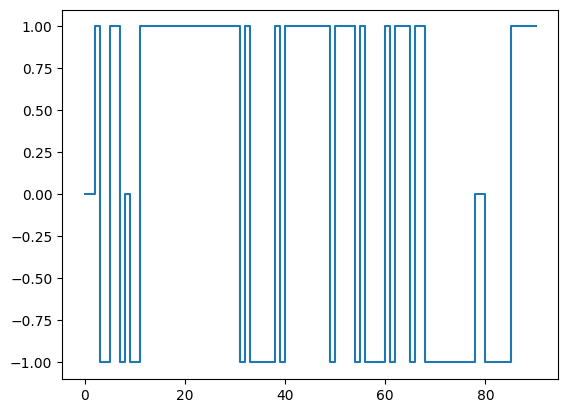

In [83]:
from matplotlib import pyplot as plt

plt.step(list(range(len(mask))), mask)
plt.show()

We need to evaluate the clustering

In [84]:
import mypackage.clustering.metrics
importlib.reload(mypackage.clustering.metrics)
mypackage.clustering.metrics.chain_clustering_silhouette_score(merged, labels)

0.13934995
